In [128]:
#Importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression 
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
%matplotlib inline

In [129]:
#load train and test
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [130]:
#View dataframe
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [131]:
print(train.shape, '\n', test.shape)

(614, 13) 
 (367, 12)


In [132]:
#check for null values in train
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [133]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [134]:
#Join train and test in a dataframe
train_len = len(train)
train_len

614

In [135]:
df = pd.concat([train, test], axis =0)
df = df.reset_index(drop=True)
df.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
976,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN
980,LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,NaN


In [136]:
df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [137]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [139]:
df.shape[1]

13

In [140]:
for i in range(0,df.shape[1]):
    if np.round(df[df.columns[i]].isna().mean(),4) < 0.2:
        if df.dtypes[i]=='object':
            df[df.columns[i]].fillna(df[df.columns[i]].mode()[0],inplace=True)
        elif df.dtypes[i]=='float64':
            df[df.columns[i]].fillna(df[df.columns[i]].mean(),inplace=True)

In [141]:
df['Loan_Status'] = df['Loan_Status'].fillna(df['Loan_Status'].mode()[0])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

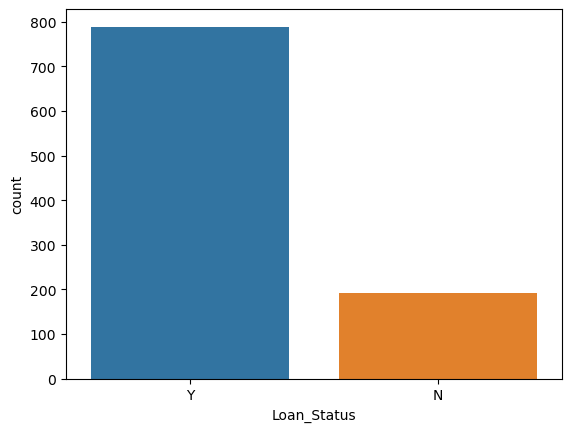

In [142]:
sns.countplot(df['Loan_Status'])

## Correllation matrix

<AxesSubplot:>

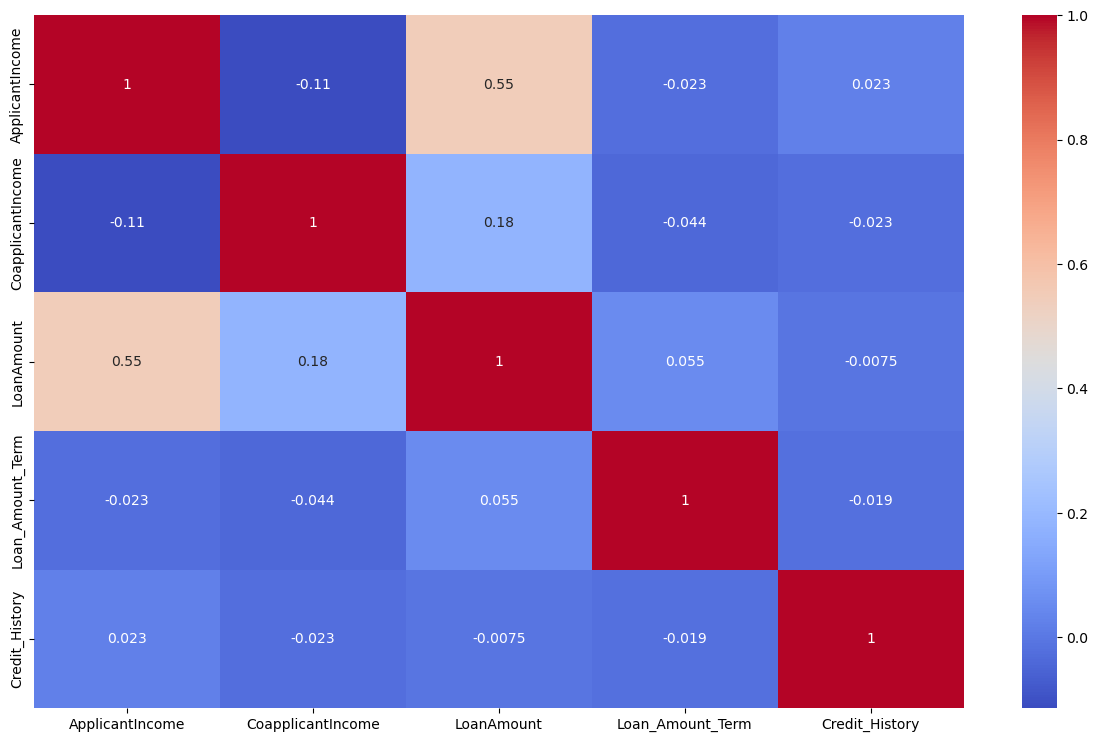

In [143]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [147]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [148]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
cols = ['Gender','Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status' ]
for col in cols:
    df[col] = le.fit_transform(df[col])
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,0


In [149]:
df = df.drop(columns = ['Loan_ID'], axis = 1)

In [150]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.00000,360.0,1.0,0,0


In [151]:
df['Property_Area'].value_counts()

1    349
2    342
0    290
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

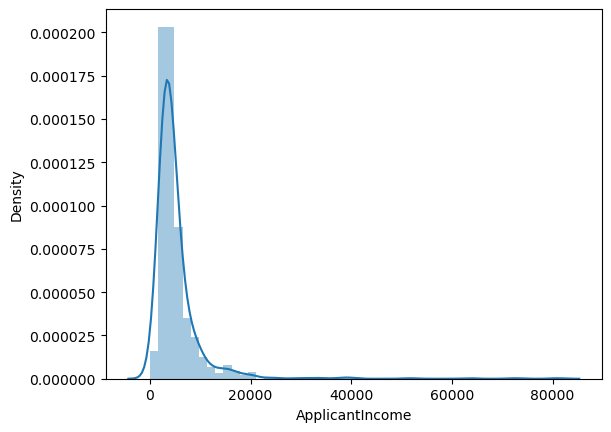

In [152]:
sns.distplot(df['ApplicantIncome'])

In [153]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [154]:
from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

df_two = pd.DataFrame(msc.fit_transform(df), columns = df.columns)

In [155]:
df_two

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.072210,0.000000,0.193215,0.746835,1.00000,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.056580,0.036192,0.172214,0.746835,1.00000,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.037037,0.000000,0.082489,0.746835,1.00000,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.031889,0.056592,0.160637,0.746835,1.00000,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.074074,0.000000,0.191027,0.746835,1.00000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
976,1.0,1.0,1.000000,1.0,1.0,0.049494,0.042648,0.150507,0.746835,1.00000,1.0,1.0
977,1.0,1.0,0.000000,0.0,0.0,0.051333,0.017016,0.153401,0.746835,1.00000,1.0,1.0
978,1.0,0.0,0.000000,0.0,0.0,0.040123,0.047832,0.169320,0.746835,0.83592,0.5,1.0
979,1.0,1.0,0.000000,0.0,0.0,0.061728,0.057432,0.215630,0.746835,1.00000,0.0,1.0


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

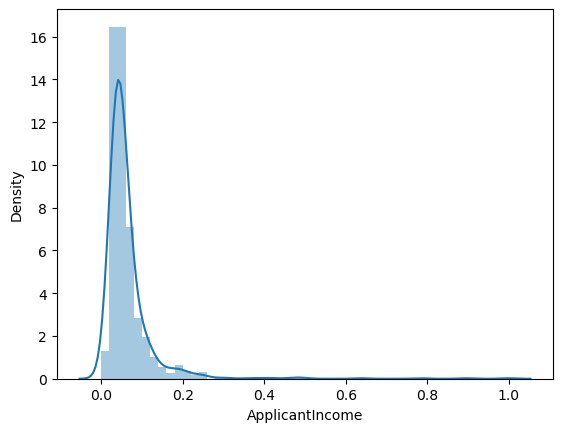

In [156]:
sns.distplot(df_two['ApplicantIncome'])

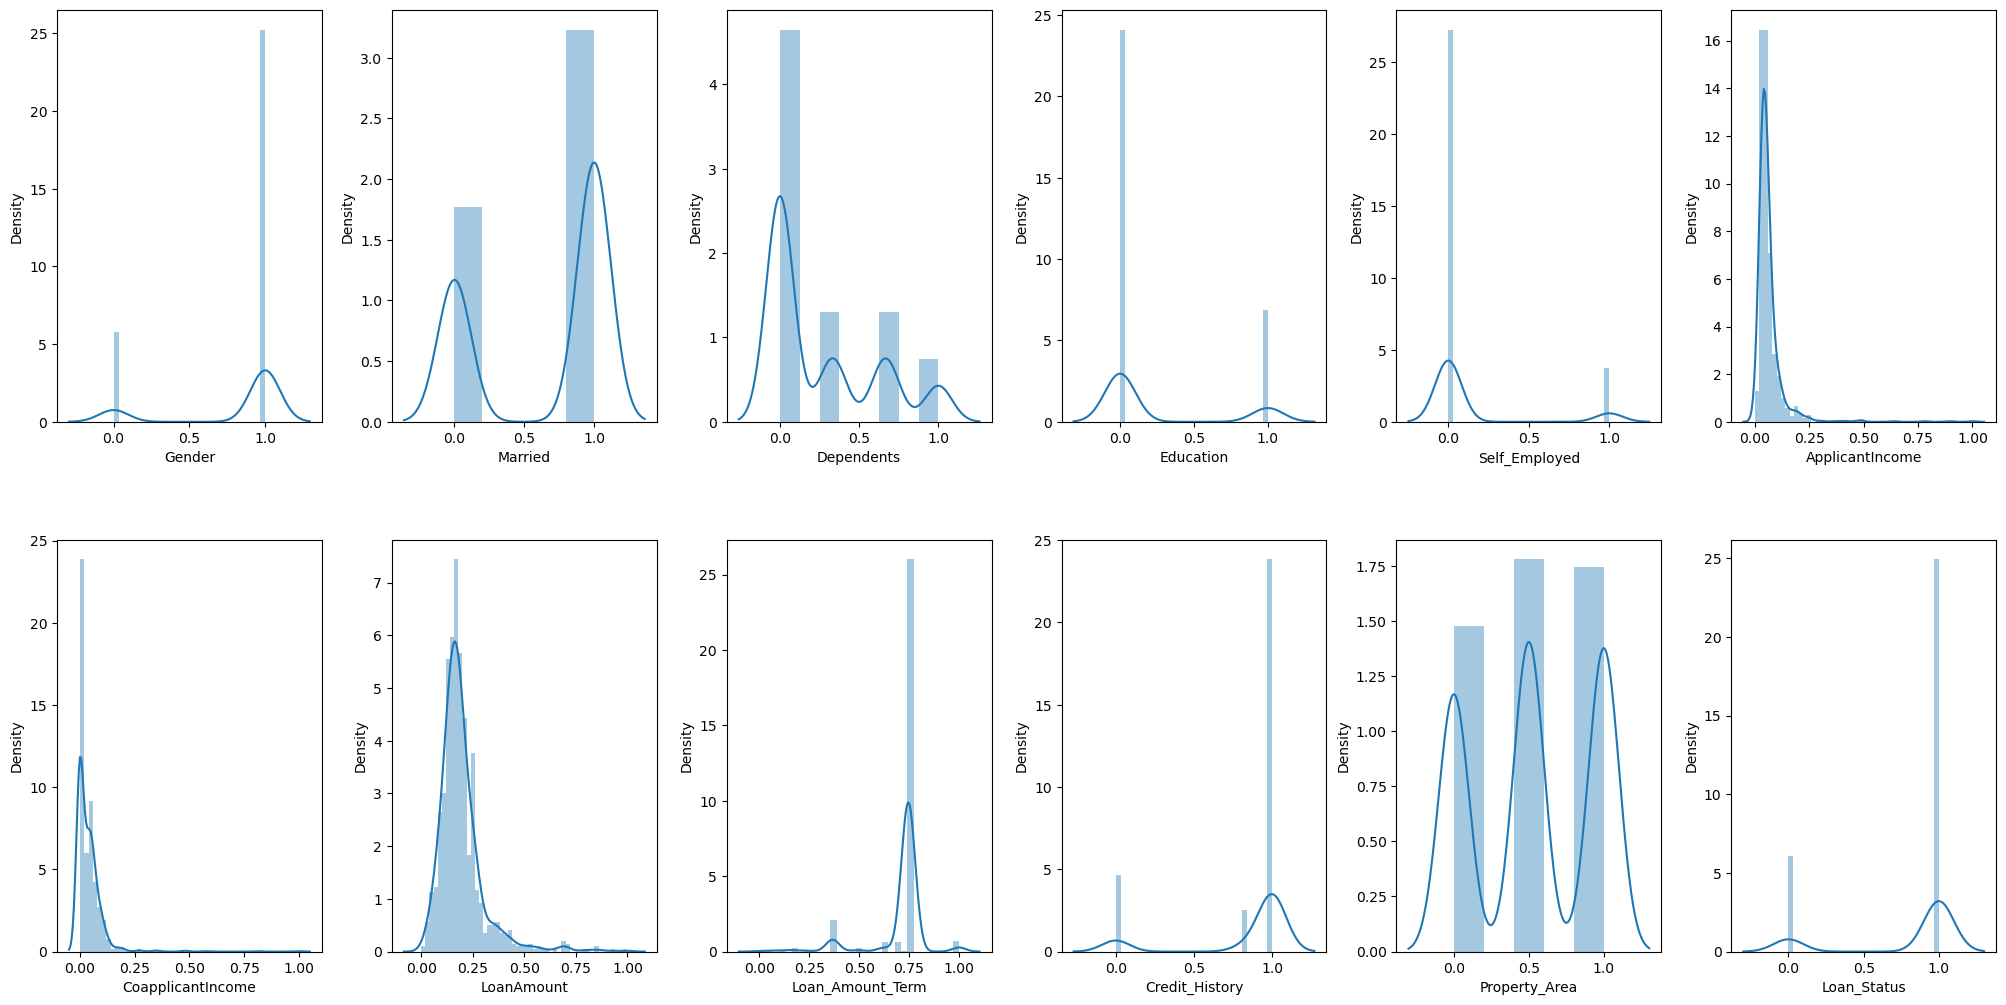

In [157]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize =(20,10))
index = 0
ax = ax.flatten()
for col, value in df_two.items():
    sns.distplot(value,  ax = ax[index])
    index +=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad = 5.0 )

In [158]:
df_two.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.072210,0.000000,0.193215,0.746835,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.056580,0.036192,0.172214,0.746835,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.037037,0.000000,0.082489,0.746835,1.0,1.0,1.0


In [159]:
df = df_two

In [160]:
train_len

614

In [161]:
#split train test
train = df.iloc[:train_len, :]
test = df.iloc[train_len:, :]

In [162]:
print(train.shape, '\n', test.shape)

(614, 12) 
 (367, 12)


In [163]:
test.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [164]:
test = test.drop(columns=['Loan_Status'], axis = 1)

In [165]:
test.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
614,1.0,1.0,0.000000,0.0,0.0,0.070617,0.0000,0.146165,0.746835,1.0,1.0
615,1.0,1.0,0.333333,0.0,0.0,0.037975,0.0360,0.169320,0.746835,1.0,1.0
616,1.0,1.0,0.666667,0.0,0.0,0.061728,0.0432,0.287988,0.746835,1.0,1.0


In [166]:
# split train features and target label
X = train.drop(columns=['Loan_Status'], axis=1)
y = train['Loan_Status']

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

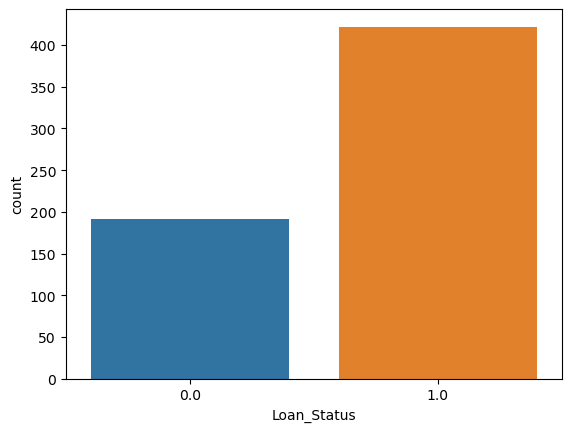

In [167]:
sns.countplot(y)

In [168]:
#To balance the target samples
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors = 4)

# fit predictor and target variable
X, y = smote.fit_resample(X, y)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

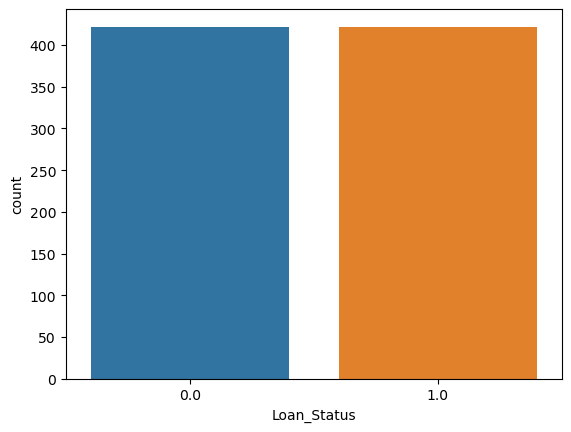

In [169]:
sns.countplot(y)

In [170]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42)

In [171]:
#Create a function to fit the model and perform cross validation
# classify column
def classify(model):
    
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test)*100)
    
    score = cross_val_score(model, x_train, y_train, cv=5)
    print('CV Score:', np.mean(score)*100)

In [172]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 65.35433070866141
CV Score: 69.83050847457626


In [173]:
from sklearn.tree import DecisionTreeClassifier
Decmodel = DecisionTreeClassifier()
classify(Decmodel)

Accuracy: 77.55905511811024
CV Score: 75.25423728813558


In [174]:
#For randomforestclassifier
Ranmodel = RandomForestClassifier(n_estimators =25, max_depth =25)
classify(Ranmodel)

Accuracy: 77.95275590551181
CV Score: 80.84745762711864


In [175]:
#USING ExtraTreesClassifier with hyperparameters
from sklearn.ensemble import ExtraTreesClassifier
EXTmodel = ExtraTreesClassifier(verbose = 0, n_estimators = 20, max_depth = 23)
classify(EXTmodel)

Accuracy: 75.19685039370079
CV Score: 80.6779661016949


In [176]:
import lightgbm
ligmodel = lightgbm.LGBMClassifier()
classify(ligmodel)

[LightGBM] [Info] Number of positive: 304, number of negative: 286
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 590, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.515254 -> initscore=0.061036
[LightGBM] [Info] Start training from score 0.061036
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

[LightGBM] [Info] Number of positive: 243, number of negative: 229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 474
[LightGBM] [Info] Number of data points in the train set: 472, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.514831 -> initscore=0.059339
[LightGBM] [Info] Start training from score 0.059339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [177]:
from catboost import CatBoostClassifier
catmodel = CatBoostClassifier(verbose=0)
classify(catmodel)

Accuracy: 75.19685039370079
CV Score: 79.15254237288136


In [178]:
#To test GridSearch
#To test with GridSearch on RandomForestClassifier
#To Test with Gridsearch model
rf = ExtraTreesClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20,30],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")


grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [179]:
(grid_search.best_score_)*100

72.71186440677965

In [180]:
rf_best = grid_search.best_estimator_
rf_best

ExtraTreesClassifier(max_depth=20, min_samples_leaf=5, n_estimators=50,
                     n_jobs=-1, random_state=42)

In [181]:
#CatBoostClassifier gave the highest accuracy on test data and cross validation score was high on train data

Extmodel_prediction = EXTmodel.predict(x_test)
print(Extmodel_prediction)

[1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1.]


In [186]:
#To Show actual value and predicted value in dataframe
view_pred = pd.DataFrame(list(zip(Extmodel_prediction, y_test)))
view_pred.columns = ['Prediction', 'Actual values']
view_pred.tail(20)

,Prediction,Actual values
234,1.0,1.0
235,1.0,1.0
236,0.0,0.0
237,0.0,0.0
238,1.0,1.0
239,1.0,1.0
240,0.0,0.0
241,1.0,1.0
242,0.0,0.0
243,0.0,0.0


In [183]:
from sklearn.metrics import confusion_matrix
y_pred = EXTmodel.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[102,  34],
       [ 29,  89]], dtype=int64)

<AxesSubplot:>

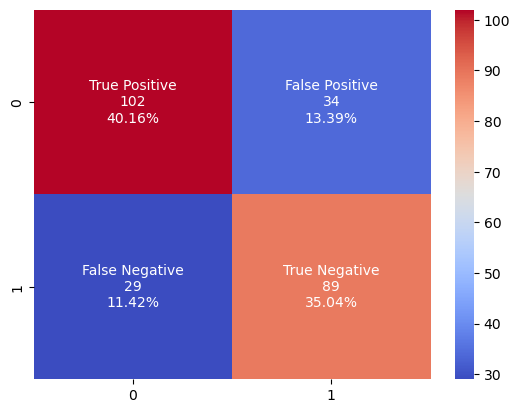

In [185]:
group_names = ['True Positive','False Positive','False Negative','True Negative']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')